In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
plt.rcParams['figure.facecolor'] = 'white'

In [7]:
cl = np.loadtxt('/Users/mehdi/github/class_public/output/explanatory01_cl.dat')
pk = np.loadtxt('/Users/mehdi/github/class_public/output/explanatory01_pk.dat')

In [8]:
!head -n 5 /Users/mehdi/github/class_public/output/explanatory01_pk.dat

# Matter power spectrum P(k) at redshift z=0
# for k=1.045e-05 to 1.09048 h/Mpc,
# number of wavenumbers equal to 603
#    1:k (h/Mpc)              2:P (Mpc/h)^3        
       1.045004358465e-05       5.246581358777e+01 


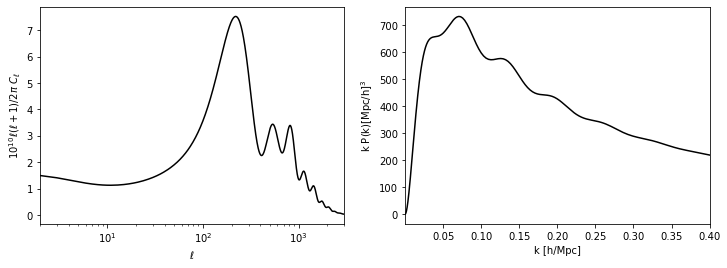

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].plot(cl[:, 0], cl[:, 1]*1.0e+10, 'k-')
ax[1].plot(pk[:, 0], pk[:, 0]* pk[:, 1], 'k-')


ax[0].set(xlabel=r'$\ell$', 
          ylabel=r'$10^{10} \ell (\ell+1)/2\pi~C_{\ell}$',
          xscale='log',
          xlim=(2, 3000))

ax[1].set(ylabel='k P(k)[Mpc/h]$^{3}$',
          xlabel='k [h/Mpc]',
          #xscale='log', 
          #yscale='log', 
          xlim=(0.0001, .4))
fig.savefig('theory_cl.png', dpi=300, bbox_inches='tight', transparent=False)

In [1]:
from pyRSD.rsd import QuasarSpectrum, GalaxySpectrum
from pyRSD.rsd.cosmology import Planck15

In [21]:
model = QuasarSpectrum(z=1.5, params=Planck15)

In [22]:
# model takes several minutes to initialize once
model.initialize()

# set kmin/kmax limits
model.kmin = 1.0e-6
model.kmax = 0.5

In [23]:
pks = []
for i, value in enumerate([-20, -10, 0, 10, 20, 100, 200]):
    model.f_nl = value
    P0 = model.poles(k, 0).squeeze() # list of 3 (100,) arrays
    pks.append(P0)

In [24]:
np.savetxt('./kpk_fnl.txt', np.column_stack([k] + pks), header='k - pk [-20, -10, 0, 10, 20, 100, 200]')

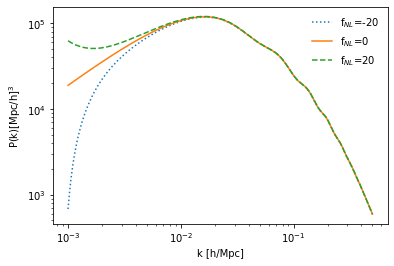

In [13]:
k = np.logspace(-3., np.log10(0.5), 200)

lt = [':', '-', '--']
for i, value in enumerate([-20, 0, 20]):
    model.f_nl = value
    P0 = model.poles(k, 0).squeeze() # list of 3 (100,) arrays
    plt.plot(k, P0, label=r'f$_{NL}$=%d'%(value), ls=lt[i])
    
plt.xscale('log')    
plt.yscale('log')    
plt.ylabel('P(k)[Mpc/h]$^{3}$')
plt.xlabel('k [h/Mpc]')
plt.legend(frameon=False)
# plt.savefig('theory_pk_fnl.png', dpi=300, bbox_inches='tight', transparent=False)